In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

MessageError: ignored

In [4]:
fake_news_dataset = '/content/gdrive/MyDrive/ai-playground/datasets/isot-fake-news.csv'
true_news_dataset = '/content/gdrive/MyDrive/ai-playground/datasets/isot-true-news.csv'

In [5]:
df_fake_news = pd.read_csv(fake_news_dataset)
df_true_news = pd.read_csv(true_news_dataset)

ParserError: ignored

In [ ]:
"df_fake_news.head()

In [ ]:
df_500words_fake_news = df_fake_news[~(df_fake_news.text.str.len() > 1000)]
df_500words_true_news = df_true_news[~(df_true_news.text.str.len() > 1000)]

In [ ]:
print(df_500words_fake_news.shape)
print(df_500words_true_news.shape)

In [ ]:
print(df_500words_fake_news.shape)
print(df_500words_true_news.shape)

(10089, 4)
(9573, 4)


In [ ]:
df_500words_fake_news['type'] = 'fake'
df_500words_true_news['type'] = 'true'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
NUMBER_OF_ROWS = 19000
df_500words_fake_news = df_500words_fake_news[:NUMBER_OF_ROWS]
df_500words_true_news = df_500words_true_news[:NUMBER_OF_ROWS]

In [ ]:
fake_news_text_list = df_500words_fake_news['text'].tolist()
true_news_text_list = df_500words_true_news['text'].tolist()

In [ ]:
LIMIT_ROWS_TO = 1000

In [ ]:
fake_news_text_list_limited = fake_news_text_list[:LIMIT_ROWS_TO]
true_news_text_list_limited = true_news_text_list[:LIMIT_ROWS_TO]

In [ ]:
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from simpletransformers.language_representation import RepresentationModel

model = RepresentationModel(
    model_type='bert',
    model_name='bert-base-uncased',
    use_cuda=True,
)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTextRepresentation: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTextRepresentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTextRepresentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
fake_news_vectors = model.encode_sentences(fake_news_text_list_limited, combine_strategy="mean")
true_news_vectors = model.encode_sentences(true_news_text_list_limited, combine_strategy="mean")

In [ ]:
fake_news_image_directory = '/content/gdrive/MyDrive/ai-playground/images/spectrogram/fake-news'
true_news_image_directory = '/content/gdrive/MyDrive/ai-playground/images/spectrogram/true-news'

FileNotFoundError: ignored

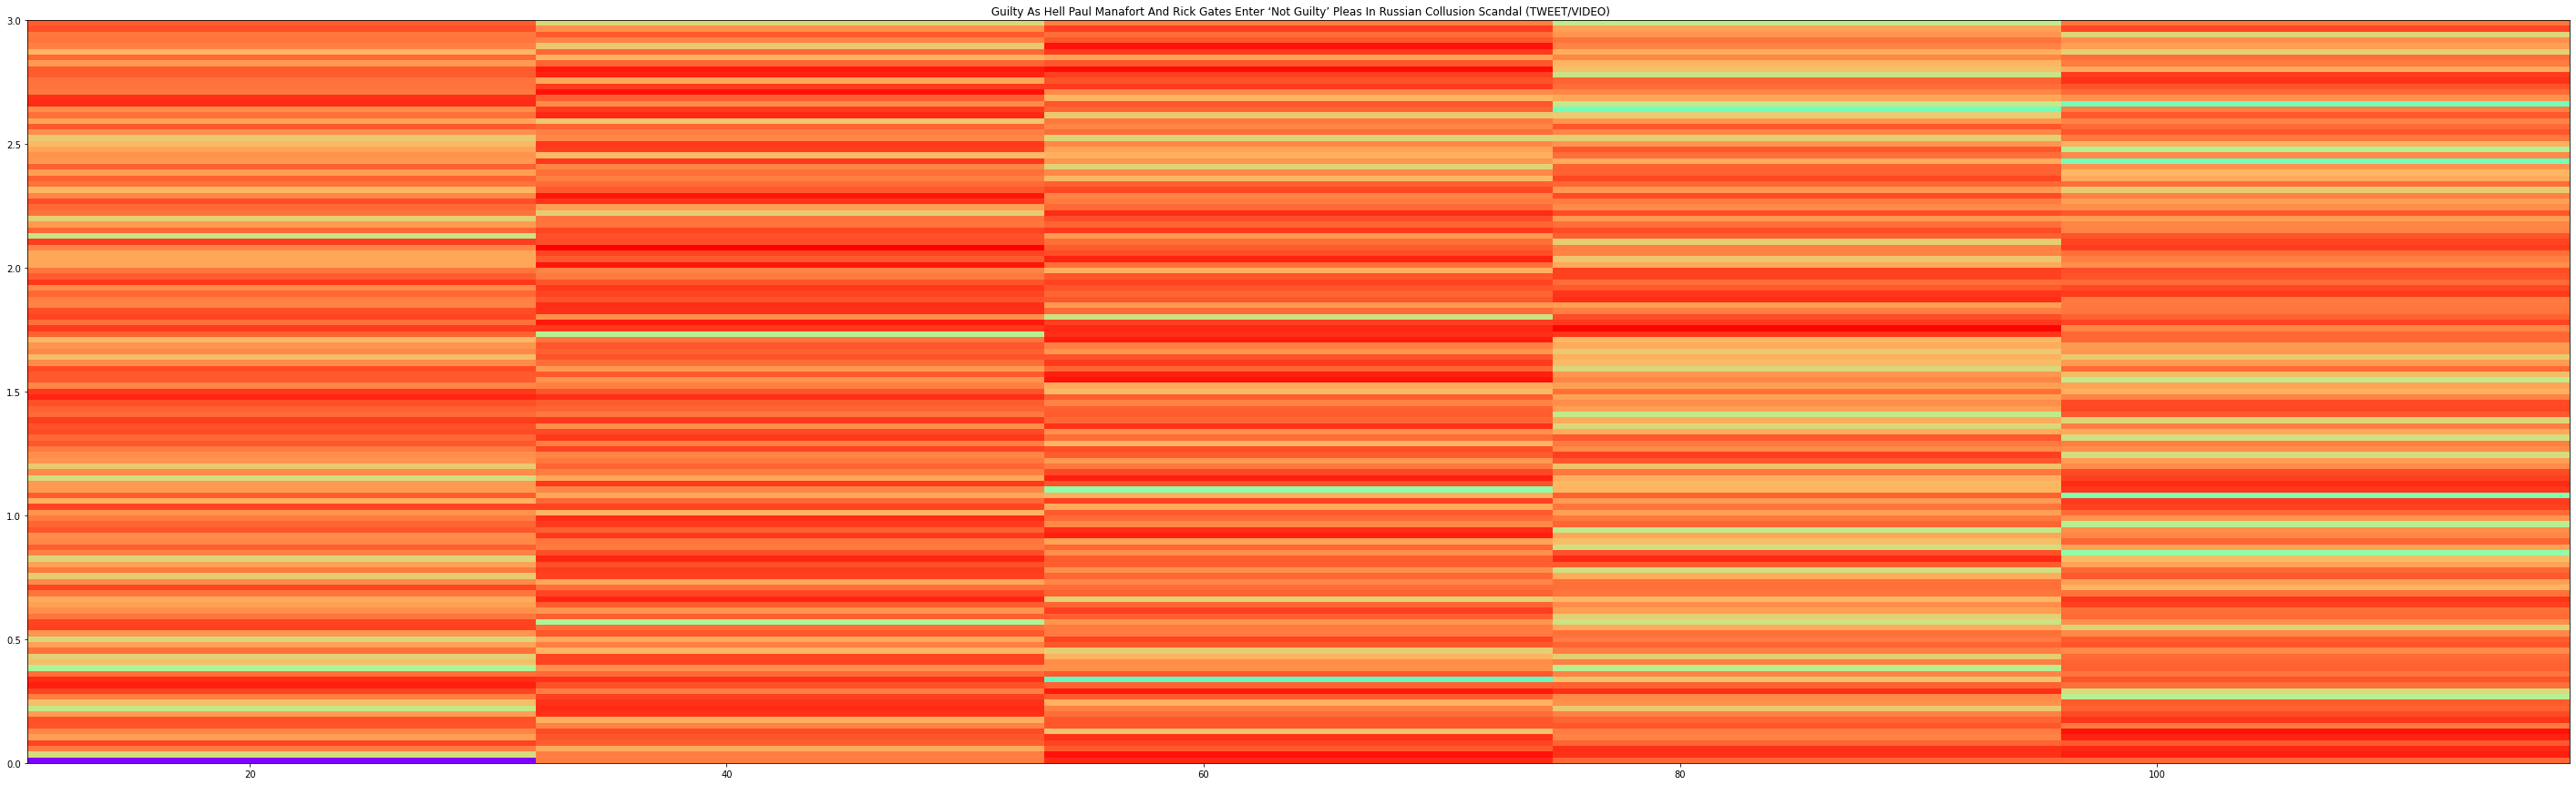

In [ ]:
for i in range(LIMIT_ROWS_TO):
  # Fake news spectrograms
  fake_news_vector = fake_news_vectors[i]
  fake_news_title = df_500words_fake_news.iloc[i]['title']
  
  plt.specgram(fake_news_vector, Fs=6, cmap="rainbow")
  plt.rcParams["figure.figsize"] = (50,15)
  plt.title(fake_news_title)
  plt.savefig(f'{fake_news_image_directory}/{fake_news_title}.png')

  # True news spectrograms
  true_news_vector = true_news_vectors[i]
  true_news_title = df_500words_true_news.iloc[i]['title']

  plt.specgram(true_news_vector, Fs=6, cmap="rainbow")
  plt.rcParams["figure.figsize"] = (50,15)
  plt.title(true_news_title)
  plt.savefig(f'{true_news_image_directory}/{true_news_title}.png')
